In [171]:
import numpy as np
import matplotlib.pyplot as plt

In [172]:
def read_admissions_from_file():
    dataList = []
    
    with open("../db/admissions.csv") as f:
        for line in f:
           dataList.append(line.strip('\n').split(','))
    
    dataArray = np.asarray(dataList[0:30001])
    
    labels = dataArray[0]
    data = dataArray[1:]
            
    return data, labels

In [173]:
X_raw, labels_raw = read_admissions_from_file()

In [174]:
def convert_types(X_raw, labels_raw):
    X_list = []
    label_list = ["age", "gender", "weight", "height", "meanbp_mean", "meanbp_min", "meanbp_max", 
                  "resprate_min", "resprate_max", "resprate_mean"]
    loss = np.zeros((len(label_list), ))
        
    for i in range(X_raw.shape[0]):
        x_list = []        
        
        # age ----------------------------------------------------
        label = "age"
        j = np.where(labels_raw == label)[0][0]
        value = float(X_raw[i][j]) if (X_raw[i][j] != '') else -1
        
        if (value > 0) & (value < 200):
            x_list.append(value)
        else:
            loss[0] += 1
            continue   
            
        # gender ------------------------------------------------
        label = "gender"
        j = np.where(labels_raw == label)[0][0]
        
        if X_raw[i][j] == 'M':
            value = 1
        elif X_raw[i][j] == 'F':
            value = -1
        else:
            value = 0        
        
        if value != 0:
            x_list.append(value)
        else:
            loss[1] += 1
            continue       
        
        # weight -------------------------------------------------
        label = "weight"
        j = np.where(labels_raw == label)[0][0]
        value = float(X_raw[i][j]) if (X_raw[i][j] != '') else -1
        
        if (value > 0) & (value < 200):
            x_list.append(value)
        else:
            loss[2] += 1
            continue
            
        # height -------------------------------------------------
        label = "height"
        j = np.where(labels_raw == label)[0][0]
        value = float(X_raw[i][j]) if (X_raw[i][j] != '') else -1
        
        if (value > 0) & (value < 300):
            x_list.append(value)
        else:
            loss[3] += 1
            continue
        
        # "meanbp_mean", "meanbp_min", "meanbp_max", "resprate_min", "resprate_max", "resprate_mean"
        for i in range(4, 10):
            label = label_list[i]
            j = np.where(labels_raw == label)[0][0]
            value = float(X_raw[i][j]) if (X_raw[i][j] != '') else -1

            if (value > 0):
                x_list.append(value) 
            else:
                loss[i] += 1
                continue       
            
        X_list.append(np.asarray(x_list))
    
    print("Loss: ")
    for i, label in enumerate(label_list):
        print(f"{label}: {int(loss[i])}")
        
    return np.asarray(X_list), np.asarray(label_list)

In [175]:
X, labels = convert_types(X_raw, labels_raw)
X.shape

Loss: 
age: 7085
gender: 0
weight: 3123
height: 10578
meanbp_mean: 0
meanbp_min: 0
meanbp_max: 0
resprate_min: 0
resprate_max: 0
resprate_mean: 0


(9214, 10)

### Means berechnen:

In [176]:
def norm_mean(X, labels, label: str):
    i = np.where(labels == label)[0][0]
    mean = X[:, i].mean()
    X[:, i] = X[:, i] - mean
    
    return X, mean

In [177]:
means = []
for label in labels:
    X, mean = norm_mean(X, labels, label)
    means.append(mean)

### Plotten:

In [178]:
def plot_distribution(X, labels, label: str, mean):
    i = labels == label
    x = X[:, i]
    
    plt.figure(figsize=(12,4))
    plt.hist(x, bins=32, rwidth=1, alpha=1, label=label, density=True)
    plt.axvline(x= x.mean(), ls='--', c='r')
    plt.title(f"Distribution of {label}, $\mu$ = {mean:4.2f}", fontsize=20)
    plt.show()

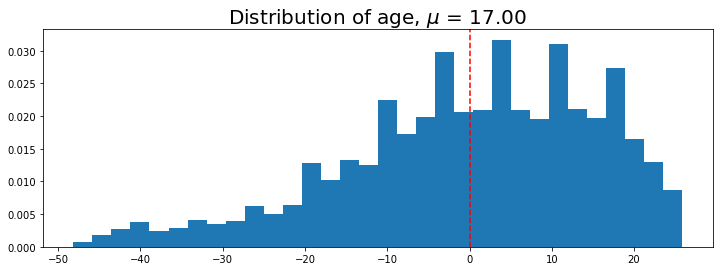

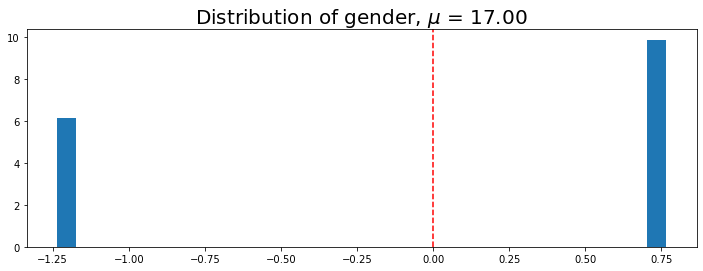

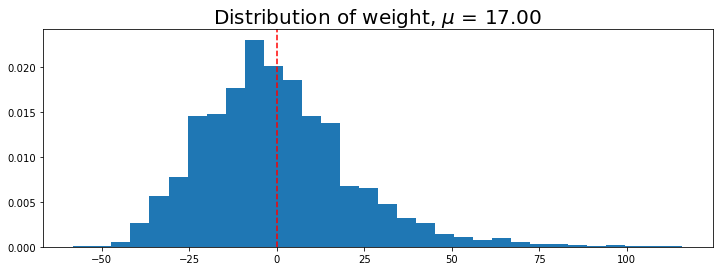

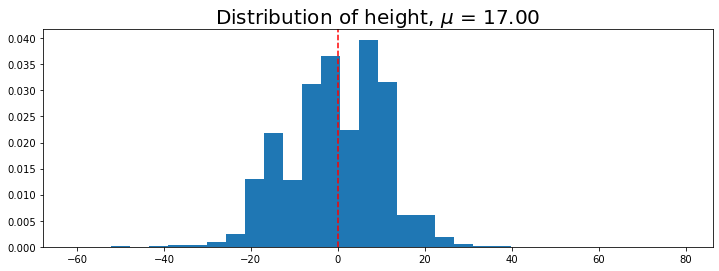

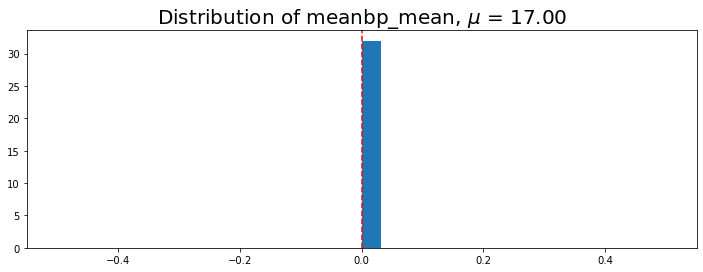

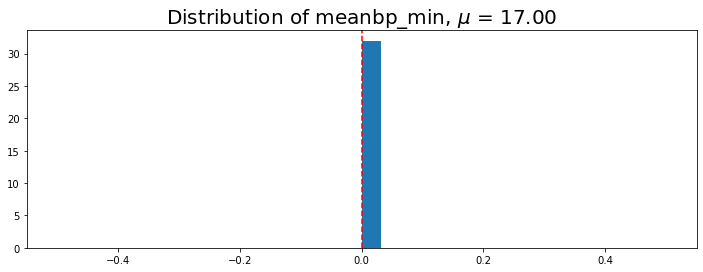

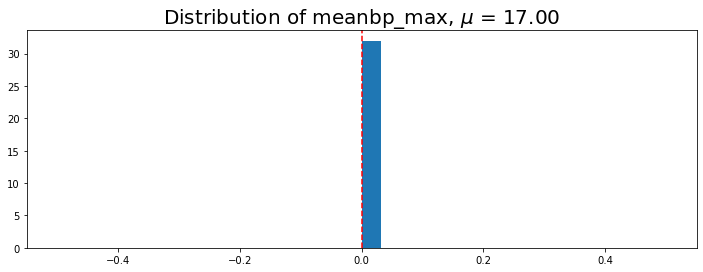

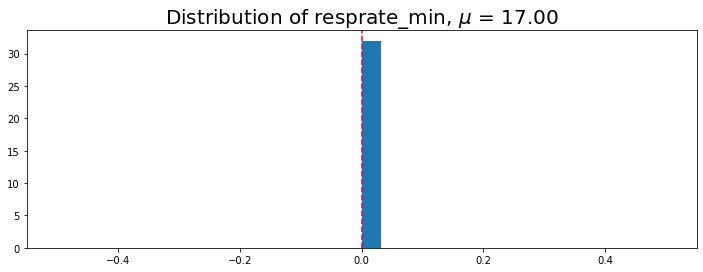

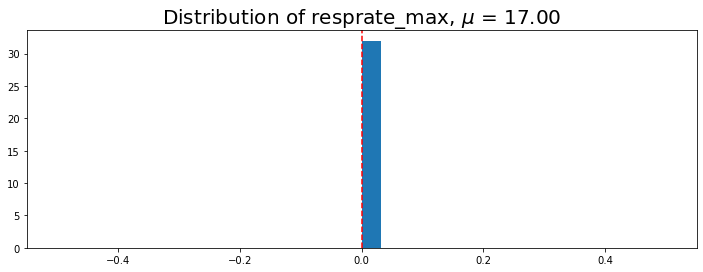

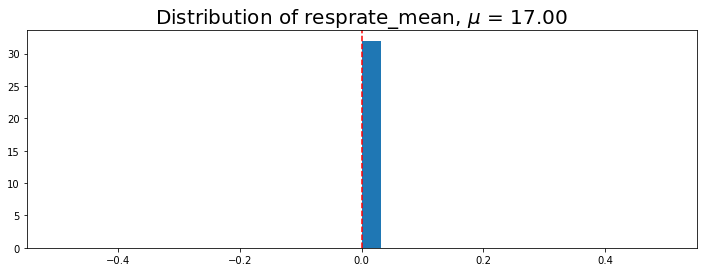

In [179]:
for label in labels:
    plot_distribution(X, labels, label, mean)

### Speichern:

In [170]:
with open('normalized_data.npy', 'wb') as f:
    np.save(f, X)
    
with open('means.npy', 'wb') as f:
    np.save(f,means)
    
with open('labels.npy', 'wb') as f:
    np.save(f,labels)

### Laden mit:

```python
with open('normalized_data.npy', 'rb') as f:
    X = np.load(f)
    
with open('means.npy', 'rb') as f:
    means = np.load(f)
    
with open('labels.npy', 'rb') as f:
    labels = np.load(f)
```